In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv(r'/Users/ismail/Desktop/LogReg/heart.csv')

In [37]:
df = df.rename(columns={"cp": "chest_pain_type","trestbps":"resting_blood_pressure","chol":"serum_cholestoral","fbs":"fasting_blood_sugar","restecg":"resting_ecg","thalach":"maximum_heart_rate","exang":"exercise_angina","oldpeak":"st_depression","ca":"major_colored","slope":"st_slope","thal":"thalassemia"})

The aim of this notebook is to implement logistic regresison algortihm, for the sake of simplicity i will extract the categorical variables.

In [38]:
y = df.target.values
X = df.drop(["target","sex","chest_pain_type","fasting_blood_sugar","resting_ecg","exercise_angina","st_slope","thalassemia"],1)

We divide the data by %80 for training the model and %20 to test the trained model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

Data Normalization

In [40]:
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train)).values

In [41]:
x_train = X_train.T
y_train = y_train.T

Logistic Regression algortihm starts here

First we initialize the weight

In [42]:
w = np.full((x_train.shape[0],1),0.01)
b = 0.0

In [43]:
cost_list = [] # we keep track of the cost values to plot and see how it behaves
index_list = [] # to plot correctly on x axis

In [44]:
learning_rate = 0.1
number_of_iterarion = 2000

In [45]:
for i in range(number_of_iterarion):
    # This is forward propagation
    z = (np.dot(w.T,x_train) + b)
    y_head = 1/(1+ np.exp(-z))
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/(x_train.shape[1])  
    
    # This is backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]  
    
    cost_list.append(cost)
    index_list.append(i)
    
    # This is gradient descent process
    w = w - learning_rate * derivative_weight
    b = b - learning_rate * derivative_bias

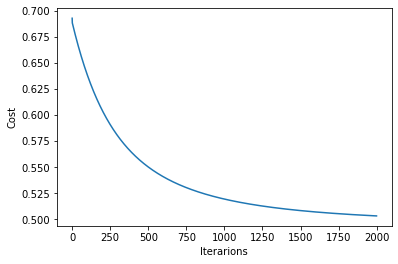

In [46]:
plt.plot(index_list,cost_list)
plt.xlabel( "Iterarions")
plt.ylabel("Cost")
plt.show()

In [47]:
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [48]:
x_test = X_test.T
y_test = y_test.T

In [49]:
z_pre = np.dot(w.T,x_test) + b
y_head = 1/(1+ np.exp(-z_pre))
y_pred = [0 if i < 0.5 else 1 for i in y_head[0]]

In [50]:
(len(y_test) - np.count_nonzero(y_test - y_pred))/len(y_test)

0.7868852459016393